<img src="logo.gif">
<br>

<center><font size="5" color="#022C5E"><b>Overview of ML Algorithms : German Credit Loan Application (UCI)</b></font></center>



## Context

A loan application form seeks a lot of information about the applicant. Such data can be used to build a classifiers to make predictions about which customers are most likely to turn up as fraudulent. The customers who have been predicted to have a high probability to default are the declined to loan.
The goal of this lab is to use historical data to build a model that could help the bank officer to decide whether or not to approve a loan request based on the information submitted by the applicant such as credit history, loan purpose, account status, employment, the loan amount, purpose of the loan, gender and marital status of the requester, etc.
From the data science point of view the aim is to evaluate various modeling techniques, calibrate their parameters as well as understand the tradeoff between the different approaches such as data and model assumptions implied by each case. In order to be able to compare the different models it is necessary to establish a figure of merit that is relevant to the business challenge.

This notebook is organized as follows
1.	Data gathering 
2.	Exploratory data analysis
3.	Preparing the data
4.	Model running
5.	Model evaluation



## Business understanding
Let's set up the given misqualification loss

In [34]:
# false positive
L_BG = 1 

# false negative
L_GB = 5

The German credit data set is widely used for benchmarking machine learning algorithms. This data has been made available by Prof. Hofmann and it is available on the web at http://archive.ics.uci.edu/-ml/datasets/Statlog . It is dataset of 1000 real customers who has had borrowed loan from areal German bank in which 70% repaid the loan and therefore are rated good credit while the remaining 30% defaulted the bank are related bad credit. Along with these outcomes, it appears customer credit history, employment, account status, the purpose of the loan, fender and marital status. Each loan for is summarized into 20 input fields.

## Data gathering

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

german_credit = pd.read_csv("German.Credit.csv") 

We verify that the data loaded successfully 

In [2]:
german_credit.head(2)

,account_balance,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign,target
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad


## Exploratory data analysis

Before getting into any sophisticated analysis, the first step is to do an exploratory data analysis in order to analyze the data sets and to summarize its main characteristics. Since both categorical and continuous variables are included in the data set, appropriate tables and summary statistics should be made.

To get an initial overview of the statistical properties of the data, we will use the function describe.
See what you can learn from the data.

**Note:** Let's note that describe in Python shows only subset of the features - only numerical.

In [3]:
# to explore the numerical
german_credit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_commitment,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
num_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [4]:
# to explore the strings
german_credit.describe(include = ['O']).transpose()

,count,unique,top,freq
account_balance,1000,4,'no account',394
credit_history,1000,5,'existing paid',530
purpose,1000,10,radio/tv,280
savings_status,1000,5,'<100',603
employment,1000,5,'1<=X<4',339
personal_status,1000,4,'male single',548
other_parties,1000,3,none,907
property_magnitude,1000,4,car,332
other_payment_plans,1000,3,none,814
housing,1000,3,own,713


### Descriptive statistics of the numerical predictors

The interquartile range (IQR) is a measure of variability, based on dividing a data set into quartiles.
Quartiles divide a rank-ordered data set into four equal parts. 
Q1 is the "middle" value in the first half of the rank-ordered data set.
Q2 is the median value in the set.
Q3 is the "middle" value in the second half of the rank-ordered data set

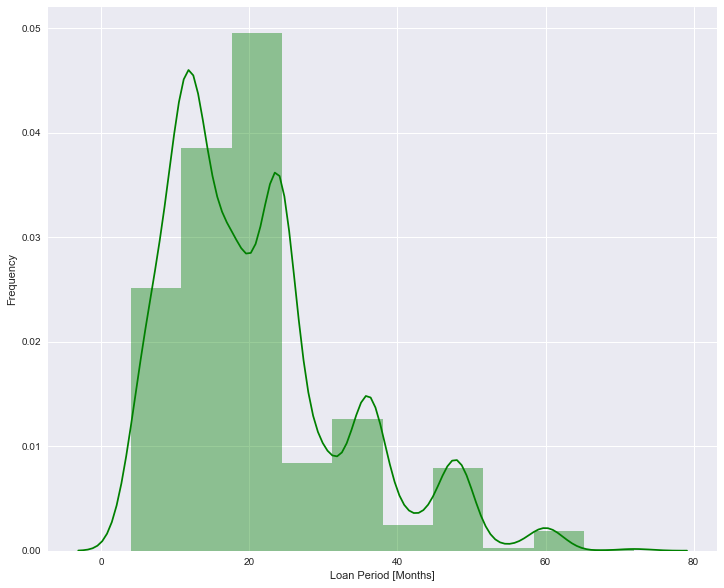

In [103]:
plt.figure(figsize=(12,10))
sns.distplot(german_credit.duration, bins=10, color='g') ;
plt.xlabel('Loan Period [Months]')
plt.ylabel('Frequency')
plt.show()

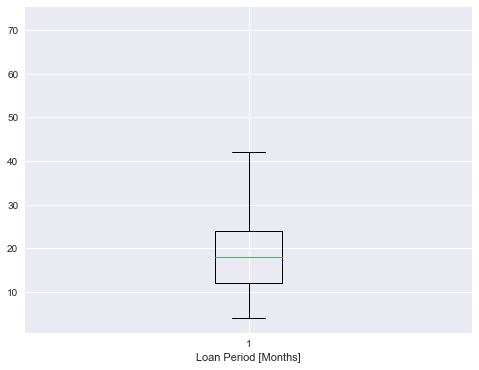

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.boxplot(german_credit.duration)
plt.xlabel('Loan Period [Months]')
plt.show()

## Model evaluation


When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision regarding whether to go ahead with the loan approval or not. Two types of risks are associated with the bank’s decision:
1. If the applicant got a good credit risk, i.e is likely to repay the loan, then not approving the loan to a person results in a loss of business to the bank.
2.	If the applicant got a bad credit risk, i.e is not likely to repay the loan, then approving the loan to a person results in a financial loss the bank.

The goal is to minimize loss from the bank’s perspective using a decision engine regarding who to give the approval of the load and who not to. An applicant’s demographic and social-economic profiles are considered by loan managers before a decision is taken regarding his/her loan application


### Training and testing datasets

In order to be able to evaluate the prediction power of a method it is desirable to split the data set into two datasets:
1.	Training dataset: the models are built based on the observations included in this set. This set of the data mimics the “historical” data used to tune the parameters of each one of the classifier.
2.	Testing dataset: the model is applied on this set to evaluate its performance. It can be considered as new applicant for credit to be evaluated on these 20 predictor values. The credit scoring that these customers are used to evaluate t what extend the classification is correct.


**Note:** In order to fit in Python, we need tranfer all categorical features to numbers:

In [17]:
from patsy import dmatrices

y, X = dmatrices('target ~ account_balance + duration + credit_history + purpose + credit_amount + savings_status +\
                 employment + installment_commitment + personal_status + other_parties + residence_since + property_magnitude +\
                 age + other_payment_plans + housing + existing_credits + job + num_dependents + own_telephone + foreign',
                 german_credit, return_type="dataframe")


In [18]:
X.head(2)

,Intercept,account_balance[T.'<0'],account_balance[T.'>=200'],account_balance[T.'no account'],credit_history[T.'critical/other existing credit'],credit_history[T.'delayed previously'],credit_history[T.'existing paid'],credit_history[T.'no credits/all paid'],purpose[T.'new car'],purpose[T.'used car'],...,job[T.skilled],own_telephone[T.yes],foreign[T.yes],duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,48.0,5951.0,2.0,2.0,22.0,1.0,1.0


In [18]:
y.head(2)

,target[bad],target[good]
0,0.0,1.0
1,1.0,0.0


We then split the german_credit data into a training (80%) and testing (20%) by using *train_test_split* and then set seed to ensure the results are reproducible.

**TIP:** you can see that our target contains 2 possible outcomes: good and bad. To make our model learn we need to transform those into binary values. Then we can use only one of the values (since they are complimentary)

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

y = label_binarize(y, classes=['good', 'bad'])

# shuffle and split training and test sets in this case we will have 70 bad and 130 good
X_train, X_test, y_train, y_test = train_test_split(X, y[:,0], test_size=0.2, random_state=1017)

We can now fix the column names of the data so we can understand them later:

In [81]:
X = X.rename(columns = {'account_balance[T.\'<0\']':'AB_1',
'account_balance[T.\'>=200\']':'AB_2',
'account_balance[T.\'no account\']':'AB_3',
'credit_history[T.\'critical/other existing credit\']':'CH_1',
'credit_history[T.\'delayed previously\']':'CH_2',
'credit_history[T.\'existing paid\']':'CH_3',
'credit_history[T.\'no credits/all paid\']' :'CH_4',
'purpose[T.\'new car\']':'PU_1',
'purpose[T.\'used car\']':'PU_2',
'purpose[T.business]':'PU_3',
'purpose[T.education]':'PU_4',
'purpose[T.furniture/equipment]':'PU_5',
'purpose[T.other]':'PU_6',
'purpose[T.radio/tv]':'PU_7',
'purpose[T.repairs]':'PU_8',
'purpose[T.retraining]':'PU_9',
'savings_status[T.\'500<=X<1000\']':'SS_1',
'savings_status[T.\'<100\']':'SS_2',
'savings_status[T.\'>=1000\']':'SS_3',
'savings_status[T.\'no known savings\']':'SS_4',
'employment[T.\'4<=X<7\']':'EM_1',
'employment[T.\'<1\']':'EM_2',
'employment[T.\'>=7\']':'EM_3',
'employment[T.unemployed]':'EM_4',
'personal_status[T.\'male div/sep\']':'PS_1',
'personal_status[T.\'male mar/wid\']':'PS_2',
'personal_status[T.\'male single\']':'PS_3',
'other_parties[T.guarantor]':'OP_1',
'other_parties[T.none]':'OP_2',
'property_magnitude[T.\'no known property\']':'PM_1',
'property_magnitude[T.\'real estate\']':'PM_2',
'property_magnitude[T.car]':'PM_3',
'other_payment_plans[T.none]':'OP_1',
'other_payment_plans[T.stores]':'OP_2',
'housing[T.own]':'HO_1',
'housing[T.rent]':'HO_2',
'job[T.\'unemp/unskilled non res\']':'JO_1',
'job[T.\'unskilled resident\']':'JO_2',
'job[T.skilled]':'JO_3',
'own_telephone[T.yes]':'OT_1',
'foreign[T.yes]':'FO_1'})



## Modeling

The models selected below can be considered as the reference models each one optimal in a different scenarios. They are commonly used as benchmark for new machine learning algorithms.
1.	Logistic regression
2.	Naïve Bayes
3.	Classification tree
4.	Random forest
5.	Support vector Machine (SVM)


For each one of them the following sequence is performed:
1.	Calculate the linear regression and display the obtained model along with the most relevant statistics
2.	Calculate the AUC
3.	Draw the ROC
4.	Calculate the optimal threshold (using training data)
5.	Build the confusion matrix for the tests data using the optimal threshold
6.	Calculate the Learned model accuracy
7.	Calculate the Miss-qualification loss


### Logistic regression
Reference: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#### 1.	Calculate the model and display relevant statistics

Let's run the model on the training data set, and see how accurate it is!

In [86]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn import preprocessing 

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Let's examine the coefficients to see what we learn.

In [105]:
pd.set_option('display.float_format', lambda x: '%.8f' % x) #to see the results in float and not in scientific format

summary = pd.DataFrame(X.columns)
summary = summary.rename(columns = {0:'Predictor'})
summary['Cooficients'] = np.transpose(logreg.coef_).tolist()

#add the p_values
from sklearn import feature_selection

model = feature_selection.SelectKBest(score_func=feature_selection.f_regression,k=4)
results = model.fit(X_train, y_train)
summary['pvalues'] = np.transpose(results.pvalues_).tolist()
summary

,Predictor,Cooficients,pvalues
0,Intercept,[0.6632546632],nan
1,AB_1,[-0.434514243465],0.00000000
2,AB_2,[0.615833155188],0.18343449
3,AB_3,[1.21817794952],0.00000000
4,CH_1,[1.18775083306],0.00000083
5,CH_2,[0.610283404289],0.54793068
6,CH_3,[0.498974160213],0.28681457
7,CH_4,[0.152377982562],0.00133787
8,PU_1,[-0.671300728886],0.00143842
9,PU_2,[0.997106528021],0.00158979


#### 2. Calculate the AUC

In [88]:
probsLR = logreg.predict_proba(X_test)

from sklearn import metrics
print (metrics.roc_auc_score(y_test, probsLR[:,1]))

0.809230769231


#### 3. Draw the ROC 

*Reminder:* **Confusion Matrix, precision, recall and ROC**

Confusion matrix is a summary of the model results as actual values vs. predicted

||          |      **Predicted**        |
|----------|:-------------:|------:|
||          |      Bad      |  Good |
|**Actual** | Bad | TP | FN |
|       | Good | FP| TN |

**Precision** is the fraction of the relevant raised alers that are relevant to the user and calculated by:
PPR = TP/(TP + FP)

**Recall** is the fraction of the alerts that are relevant to the query that are successfully retrieved and calculated by:
TPR = TP/P or FP/(TP + FN)

** F1 **
F1 is a measure of a test's accuracy and calculated by:
F1 = 2 X (Precision X Recall)/ (Precision + Recall)

***ROC*** is a graphical plot that illustrates the performance of a binary classifier system as its discrimination threshold is varied. The curve is created by plotting the *true positive rate (TPR)* against the *false positive rate (FPR)* at various threshold settings. 
The true-positive rate is also known as sensitivity, recall or probability of detection[1] in machine learning. The false-positive rate is also known as the fall-out or probability of false alarm[1] and can be calculated as (1 − specificity).

**sensitivity, recall, hit rate, or true positive rate (TPR)**

TPR = TP/P or FP/(TP + FN)

**fall-out or false positive rate (FPR)**

FPR = FP/N or FP/(FP + TN)

https://en.wikipedia.org/wiki/Receiver_operating_characteristic

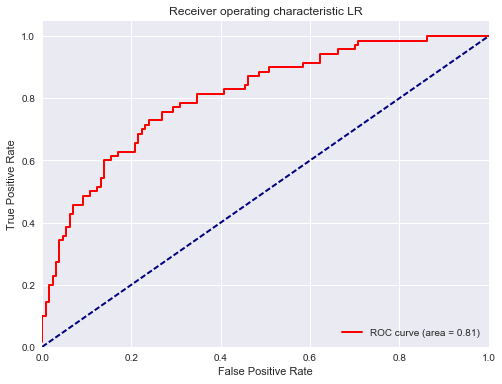

In [61]:
from sklearn.metrics import roc_curve, auc

n_classes = 1

# Learn to predict each class against the other
y_score = probsLR[:,1]


fprLR, tprLR, thrshLR = roc_curve(y_test, y_score)
roc_aucLR = auc(fprLR, tprLR)


plt.figure(figsize=(8,6))
lw = 2
plt.plot(fprLR, tprLR, color='red', lw=lw, label='ROC curve (area = %0.2f)' % roc_aucLR)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic LR')
plt.legend(loc="lower right")
plt.show()

#### 4.Calculate the optimal threshold (using training data)
Let's calculate the optimal threshold (using the training data). The optimal cut off would be where tpr is high and fpr is low.
tpr - (1-fpr) is zero or near to zero is the optimal cut off point

        1-fpr        fpr          tf  thresholds        tpr
44 0.73076923 0.26923077 -0.00219780  0.28949097 0.72857143


[]

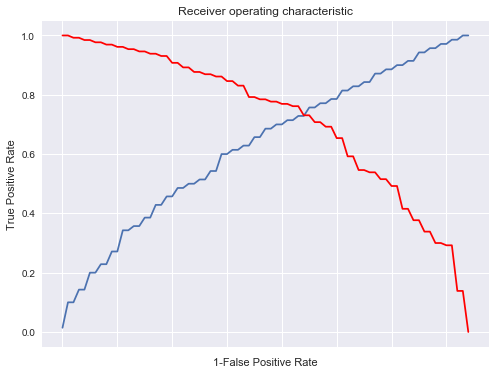

In [94]:
import pylab as pl

i = np.arange(len(tprLR)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fprLR, index=i),
                    'tpr' : pd.Series(tprLR, index = i), 
                    '1-fpr' : pd.Series(1-fprLR, index = i), 
                    'tf' : pd.Series(tprLR - (1-fprLR), index = i), 
                    'thresholds' : pd.Series( thrshLR , index = i)})
print(roc.ix[(roc.tf-0).abs().argsort()[:1]])

# Plot tpr vs 1-fpr
fig, ax = pl.subplots(figsize=(8,6))
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

#### 5. Build the confusion matrix for the tests data using the optimal threshold

In [63]:
# Add prediction probability to dataframe
probs = logreg.predict_proba(X_test)

# Find prediction to the dataframe applying threshold
threshold = roc.ix[(roc.tf-0).abs().argsort()[:1]].thresholds.values
pred = np.where(probs[:,1] > threshold , 1, 0)

# Print confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix_LR = confusion_matrix(y_test, pred)
print( conf_matrix_LR )
class_report_LR = classification_report(y_test, pred)
print( class_report_LR )


[[96 34]
 [19 51]]
             precision    recall  f1-score   support

          0       0.83      0.74      0.78       130
          1       0.60      0.73      0.66        70

avg / total       0.75      0.73      0.74       200



#### 6.	Calculate the Learned model accuracy
Now we can estimate model accuracy on the class labels for the test set. You can use the function *predict*


In [32]:
predictedLR = logreg.predict(X_test)
print (metrics.accuracy_score(y_test, predictedLR))

0.75


#### 7. Calculate the loss


In [35]:
loss_LR = L_GB*conf_matrix_LR[1,0] + L_BG*conf_matrix_LR[0,1]
print(loss_LR)

129


### Naive Bayesian

reference - http://scikit-learn.org/stable/modules/naive_bayes.html

#### 1.	Calculate the model and display relevant statistics
Since we already sliced our data into train and test we can go ahead and train our model

In [36]:
from sklearn.naive_bayes import GaussianNB

naiveBayesModel = GaussianNB()
naiveBayesModel.fit(X_train, y_train)  

GaussianNB(priors=None)

#### 2.	Calculate the AUC

In [37]:
probsNB = naiveBayesModel.predict_proba(X_test)
from sklearn import metrics
print (metrics.roc_auc_score(y_test, probsNB[:,1]))

0.82043956044


#### 3.	Draw the ROC

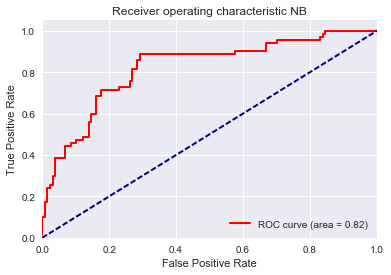

In [64]:
from sklearn.metrics import roc_curve, auc

n_classes = 1

# Learn to predict each class against the other
y_score = probsNB[:,1]


fprNB, tprNB, thrshNB = roc_curve(y_test, y_score)
roc_aucNB = auc(fprNB, tprNB)


plt.figure()
lw = 2
plt.plot(fprNB, tprNB, color='red', lw=lw, label='ROC curve (area = %0.2f)' % roc_aucNB)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic NB')
plt.legend(loc="lower right")
plt.show()

#### 4.	Calculate the optimal threshold (using training data)

       1-fpr       fpr       tf  thresholds       tpr
30  0.738462  0.261538 -0.00989    0.389802  0.728571


[]

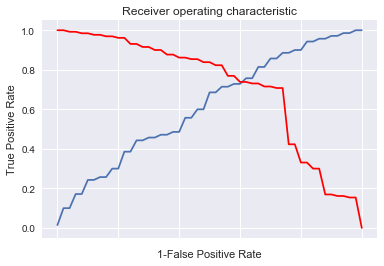

In [39]:
import pylab as pl

i = np.arange(len(tprNB)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fprNB, index=i),
                    'tpr' : pd.Series(tprNB, index = i), 
                    '1-fpr' : pd.Series(1-fprNB, index = i), 
                    'tf' : pd.Series(tprNB - (1-fprNB), index = i), 
                    'thresholds' : pd.Series(thrshNB, index = i)})
print(roc.ix[(roc.tf-0).abs().argsort()[:1]])

# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

#### 5.	Build the confusion matrix for the tests data using the optimal threshold

In [65]:
# Add prediction probability to dataframe
probs = naiveBayesModel.predict_proba(X_test)

# Find prediction to the dataframe applying threshold
threshold = roc.ix[(roc.tf-0).abs().argsort()[:1]].thresholds.values
pred = np.where(probs[:,1] > threshold , 1, 0)

# Print confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix_NB = confusion_matrix(y_test, pred)
print( conf_matrix_NB )
class_report_NB = classification_report(y_test, pred)
print( class_report_NB )

[[95 35]
 [14 56]]
             precision    recall  f1-score   support

          0       0.87      0.73      0.79       130
          1       0.62      0.80      0.70        70

avg / total       0.78      0.76      0.76       200



#### 6.	Calculate the Learned model accuracy

In [66]:
predictedNB = naiveBayesModel.predict(X_test)
print (metrics.accuracy_score(y_test, predictedNB))

0.75


#### 7. Calculate the loss

In [67]:
loss_NB = L_GB*conf_matrix_NB[1,0] + L_BG*conf_matrix_NB[0,1]
print(loss_NB)

105


### Decision Trees

Reference - http://scikit-learn.org/stable/modules/tree.html

#### 1. Calculate the model and display relevant statistics
Once again -the data prepared and we can go ahead and train our model

In [68]:
from sklearn import tree
#DecisionTreeRegressor
decisionTreeModel = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy')
decisionTreeModel = decisionTreeModel.fit(X_train, y_train)

#### 2.	Calculate the AUC

In [69]:
probsDT = decisionTreeModel.predict_proba(X_test)
print (metrics.roc_auc_score(y_test, probsDT[:,1]))

0.747912087912


#### 3.	Draw the ROC

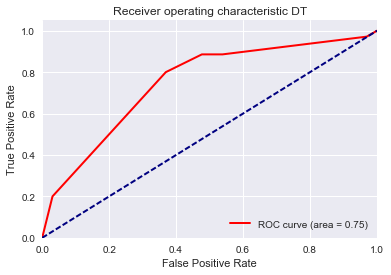

In [72]:
from sklearn.metrics import roc_curve, auc

n_classes = 1

# Learn to predict each class against the other
y_score = probsDT[:,1]


fprDT, tprDT, thrshDT = roc_curve(y_test, y_score)
roc_aucDT = auc(fprDT, tprDT)


plt.figure()
lw = 2
plt.plot(fprDT, tprDT, color='red', lw=lw, label='ROC curve (area = %0.2f)' % roc_aucDT)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic DT')
plt.legend(loc="lower right")
plt.show()

#### 4.	Calculate the optimal threshold (using training data)

      1-fpr       fpr        tf  thresholds  tpr
2  0.630769  0.369231  0.169231     0.39404  0.8


[]

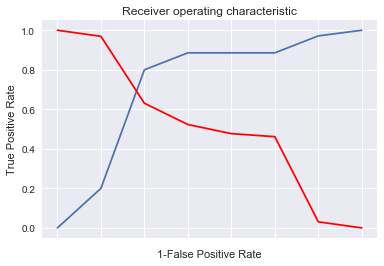

In [74]:
import pylab as pl

i = np.arange(len(tprDT)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fprDT, index=i),
                    'tpr' : pd.Series(tprDT, index = i), 
                    '1-fpr' : pd.Series(1-fprDT, index = i), 
                    'tf' : pd.Series(tprDT - (1-fprDT), index = i), 
                    'thresholds' : pd.Series(thrshDT, index = i)})
print(roc.ix[(roc.tf-0).abs().argsort()[:1]])

# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

#### 5.	Build the confusion matrix for the tests data using the optimal threshold

In [48]:
# Add prediction probability to dataframe
probs = decisionTreeModel.predict_proba(X_test)

# Find prediction to the dataframe applying threshold
threshold = roc.ix[(roc.tf-0).abs().argsort()[:1]].thresholds.values
pred = np.where(probs[:,1] > threshold , 1, 0)

# Print confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix_DT = confusion_matrix(y_test, pred)
print( conf_matrix_DT )
class_report_DT = classification_report(y_test, pred)
print( class_report_DT )

[[126   4]
 [ 56  14]]
             precision    recall  f1-score   support

          0       0.69      0.97      0.81       130
          1       0.78      0.20      0.32        70

avg / total       0.72      0.70      0.64       200



#### 6.	Calculate the Learned model accuracy

In [75]:
predictedDT = decisionTreeModel.predict(X_test)
print (metrics.accuracy_score(y_test, predictedDT))

0.7


#### 7. Calculate the loss

In [106]:
loss_DT = L_GB*conf_matrix_DT[1,0] + L_BG*conf_matrix_DT[0,1]
print(loss_DT)

284


### Performance summary

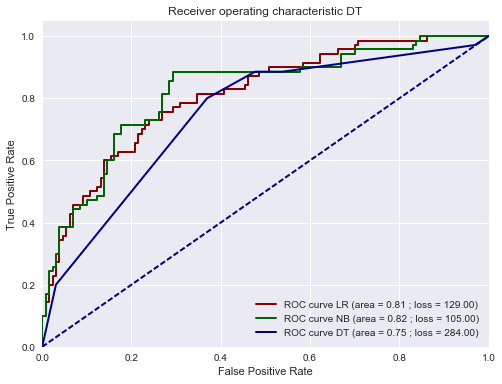

In [95]:
plt.figure(figsize=(8,6))
lw = 2
plt.plot(fprLR, tprLR, color='darkred', lw=lw, label='ROC curve LR (area = %0.2f ; loss = %0.2f)' % (roc_aucLR,loss_LR))
plt.plot(fprNB, tprNB, color='darkgreen', lw=lw, label='ROC curve NB (area = %0.2f ; loss = %0.2f)' % (roc_aucNB,loss_NB))
plt.plot(fprDT, tprDT, color='darkblue', lw=lw, label='ROC curve DT (area = %0.2f ; loss = %0.2f)' % (roc_aucDT,loss_DT))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic DT')
plt.legend(loc="lower right")
plt.show()